# Assignment 3 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
lic = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/licenses_fall2022.csv")

In [ ]:
lic

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,888281,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129002843.0,NOT RENEWED,N,NaN,JENNIFER,NaN,DARROW,...,None,None,None,N,08/03/2006,None,None,None,None,None
9996,766623,DETECTIVE BOARD,FIREARM CONTROL CARD,229014180,TERMINATED CARD RETURNED,N,NaN,BRYAN,NaN,WILLIAMS,...,None,None,None,N,08/07/2006,None,None,None,None,None
9997,399398,COSMO,LICENSED COSMETOLOGIST,11120249,NOT RENEWED,N,NaN,EUGENE,NaN,HENDERSON JR,...,None,None,None,N,05/26/2006,None,None,None,None,None
9998,486713,COSMO,LICENSED COSMETOLOGIST,11193270,ACTIVE,N,NaN,MAHLON DOUGLAS,NaN,CLIFT,...,None,None,None,N,12/17/2021,None,None,None,None,None


In [ ]:
lic.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
lic.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason'],
      dtype='object')

## Prompt 1: Relationship between the Original Issue Year and the Expiration Year

In [ ]:
lic['Original Issue Date'] = pd.to_datetime(lic['Original Issue Date'],
                                                 errors='coerce',format='%m/%d/%Y')

In [ ]:
lic['Original Issue Date']

0      2020-02-03
1      1995-02-07
2      1945-02-28
3      2011-11-22
4      1995-07-12
          ...    
9995   1987-08-04
9996   1989-05-22
9997   1966-05-09
9998   1983-10-04
9999   2008-10-16
Name: Original Issue Date, Length: 10000, dtype: datetime64[ns]

In [ ]:
lic['Original Issue Year'] = lic['Original Issue Date'].dt.year

# if it's null value then replace
if lic['Original Issue Year'].isnull().values.any() == True:
    lic['Original Issue Year'] = lic['Original Issue Year'].replace(np.nan, 0)

In [ ]:
lic['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

In [ ]:
lic['Expiration Date'] = pd.to_datetime(lic['Expiration Date'],errors='coerce',format='%m/%d/%Y')

In [ ]:
lic['Expiration Date']

0      2021-09-30
1      2003-12-31
2      1983-09-30
3      2023-09-30
4      2002-10-31
          ...    
9995   1997-05-31
9996   1990-06-11
9997          NaT
9998   2023-09-30
9999   2024-09-30
Name: Expiration Date, Length: 10000, dtype: datetime64[ns]

In [ ]:
lic['Expiration Year'] = lic['Expiration Date'].dt.year

# if it's null value then replace
if lic['Expiration Year'].isnull().values.any() == True:
    lic['Expiration Year'] = lic['Expiration Year'].replace(np.nan, 0)

In [ ]:
lic['Expiration Year']

0       2021.0
1       2003.0
2       1983.0
3       2023.0
4       2002.0
         ...  
9995    1997.0
9996    1990.0
9997       0.0
9998    2023.0
9999    2024.0
Name: Expiration Year, Length: 10000, dtype: float64

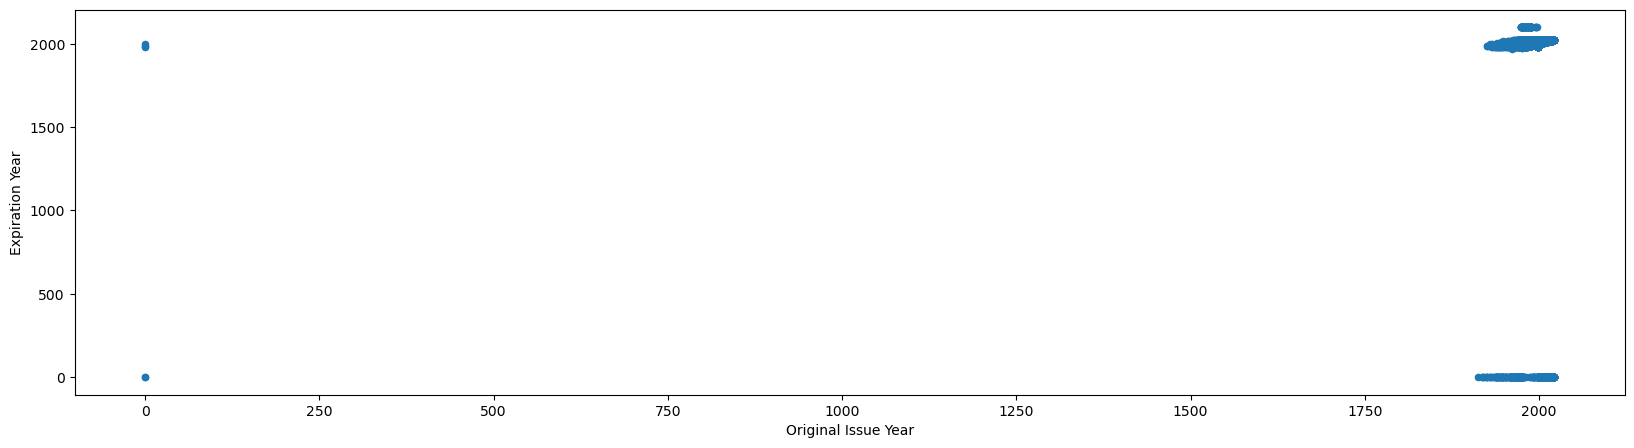

In [ ]:
ax = lic.plot(x='Original Issue Year', y='Expiration Year', figsize=(20,5), kind='scatter')
plt.show()

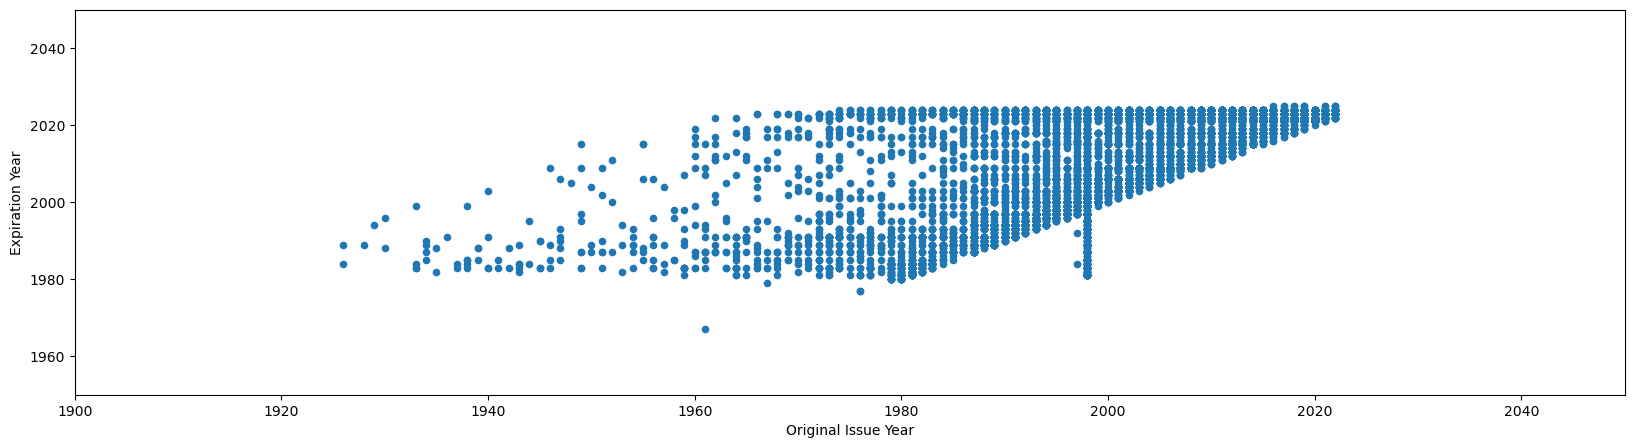

In [ ]:
ax = lic.plot(x='Original Issue Year', y='Expiration Year', figsize=(20,5), kind='scatter')
ax.set_xlim(1900,2050)
ax.set_ylim(1950,2050)
plt.show()

### Write-up for prompt 1

In order to get "Original Issue Year", I extracted year from "Original Issue Date". Same, I extracted "Expiration Year" from "Expiration Date". Next, I tackled null value by raplacing them as "NaN". Last, since we're interested in knowing the relationship among every data point, I decided to go with a scatter plot to see if there's a trend. In the first plot, I found it harder to see a meaningful trend. I zoomed in to the right upper corner and then we got the 
final scatter plot which shows the relationship between original issue year 1900-2040 and expiration year 1960-2040.

## Prompt 2: Average Effective Year as a function of License Type

In [ ]:
lic['Effective Year'] = lic['Expiration Date'].dt.year - lic['Original Issue Date'].dt.year

# if it's null value then replace
if lic['Effective Year'].isnull().values.any() == True:
    lic['Effective Year'] = lic['Effective Year'].replace(np.nan, 0)

In [ ]:
lic['Effective Year']

0        1.0
1        8.0
2       38.0
3       12.0
4        7.0
        ... 
9995    10.0
9996     1.0
9997     0.0
9998    40.0
9999    16.0
Name: Effective Year, Length: 10000, dtype: float64

In [ ]:
stats = lic.groupby("License Type")["Effective Year"].describe()

In [ ]:
type(stats)

pandas.core.frame.DataFrame

In [ ]:
stats['mean']

License Type
APPRAISAL                  0.800000
ARCHITECT                 15.650000
ATHLETIC TRAINER           9.714286
ATHLETICS                  1.333333
AUCTIONEER                 5.000000
CEMETERY OVERSIGHT         7.000000
CLIN PSYCHOLOGIST          9.625000
COLLECTION AGENCY          4.761905
COMM ASSOC MGR             5.324324
COSMO                      9.904258
DENTAL                    17.225981
DESIGN FIRM               10.140845
DETECT. DECEPTION          1.000000
DETECTIVE BOARD            7.205876
DIETETIC AND NUTRITION    10.876712
ENVIRON. HLTH PRACT       13.384615
FUNERAL AND EMBALMER       3.551020
GEOLOGY                   17.000000
HME AND SERVICES PROV      7.375000
HOME INSPECTOR             4.978261
IDPR                       7.555556
INTERIOR DESIGN           14.000000
LAND SURVEYOR BOARD       18.058824
LANDSCAPE ARCHITECT       11.714286
LIMITED LIABILITY CO       5.142857
MAR AND FAM THERAPIST     10.285714
MASSAGE LICENSING BD       7.076923
MEDICAL BOARD  

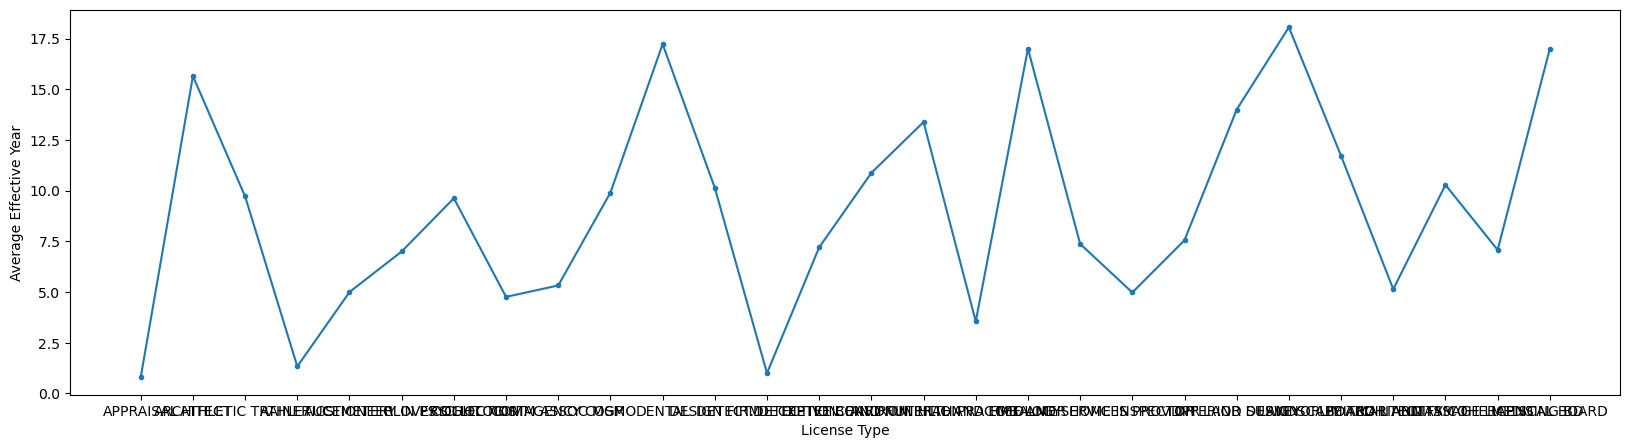

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(stats['mean'],marker='.')
ax.set_xlabel('License Type')
ax.set_ylabel('Average Effective Year')
plt.show()

### Write-up for prompt 2

In order to get "Effective Year", firstly I took (Expiration Date - Original Issue Date) to gain a time period. Next, same as prompt 1, I extracted year from this time period and condidered it as "Effective Year". I then grouped data by "License Type" because I am interested in knowing the Average Effective Year (y) of each License Type (x). 

## Prompt 3: Median Effective Month in each Effective Issue Year as a function of median Original Issue Year

In [ ]:
lic['Effective Month'] = lic['Expiration Date'].dt.month - lic['Original Issue Date'].dt.month

In [ ]:
lic['Effective Month']

0        7.0
1       10.0
2        7.0
3       -2.0
4        3.0
        ... 
9995    -3.0
9996     1.0
9997     NaN
9998    -1.0
9999    -1.0
Name: Effective Month, Length: 10000, dtype: float64

In [ ]:
lic['Original Issue Year'] = lic['Original Issue Date'].dt.year

In [ ]:
lic['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

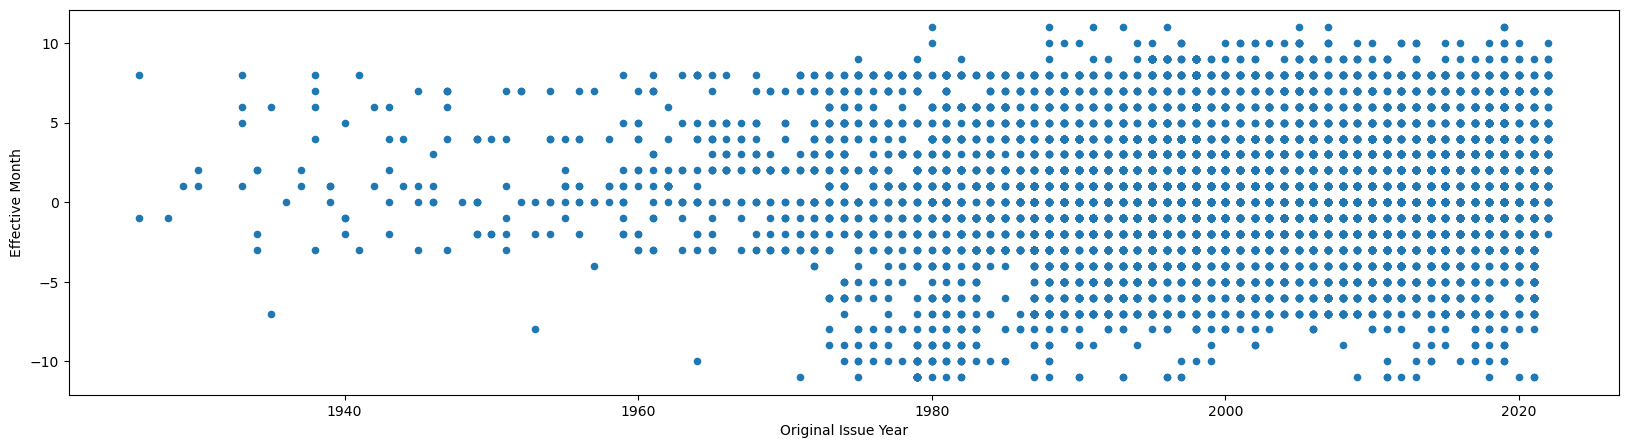

In [ ]:
ax = lic.plot(x='Original Issue Year', y='Effective Month', figsize=(20,5), kind='scatter')
plt.show()

In [ ]:
stats = lic.groupby("Original Issue Year")["Effective Month"].describe()

In [ ]:
stats

,count,mean,std,min,25%,50%,75%,max
Original Issue Year,,,,,,,,
1912.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926.0,2.0,3.500000,6.363961,-1.0,1.25,3.5,5.75,8.0
...,...,...,...,...,...,...,...,...
2018.0,209.0,0.904306,4.235885,-11.0,-2.00,1.0,4.00,10.0
2019.0,232.0,1.465517,4.196331,-10.0,-1.00,1.0,5.00,11.0
2020.0,187.0,0.962567,4.309740,-11.0,-3.00,1.0,4.00,10.0


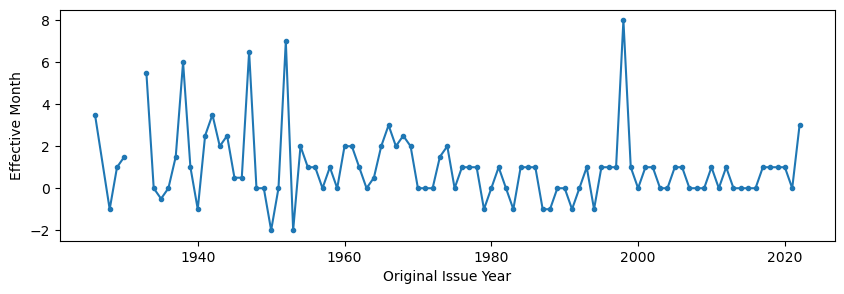

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['50%'],marker='.')
ax.set_xlabel('Original Issue Year')
ax.set_ylabel('Effective Month')
plt.show()

### Write-up for prompt 3

In order to get "Effective Month", firstly I took (Expiration Date - Original Issue Date) to gain a time period. Next, same as prompt 1&2, I extracted month from this time period and condidered it as "Effective Month". I then defined stats by grouping data by "Original Issue Year" to see each year's effective month. Last, I decided to go with the line graph because we're interested in visualizing Median Effective Month in each Effective Issue Year(y) of median Original Issue Year (x). 

### Discussion

If I had more time, I'd look into a way to remove all entries with any null value. I believe although there is only a tiny percetage of null value existing in the dataset, removing them from the dataset helps optimize the precision of either scatter plot or line graph.

**bold text**## Reference


used code from class:
https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek03%2FinClass_week03.ipynb